In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from networkx.algorithms.centrality import degree_centrality, betweenness_centrality
from sklearn.metrics import silhouette_score
from networkx.algorithms.community.quality import modularity
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
from matplotlib import cm

In [ ]:
data1 = pd.read_csv("prabowo-1.csv")
data2 = pd.read_csv("prabowo-2.csv")
data3 = pd.read_csv("prabowo-3.csv")
data4 = pd.read_csv("prabowo-4.csv")

df = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Eksplorasi Data


In [ ]:
total_rows = len(df)
print(f"Total jumlah baris dalam dataset: {total_rows}")

Total jumlah baris dalam dataset: 9056


In [ ]:
df.head()

conversation_id_str                      created_at  favorite_count  \
0  1903865514310664621  Sun Mar 23 17:44:45 +0000 2025               0   
1  1903865458123755674  Sun Mar 23 17:44:31 +0000 2025               0   
2  1903863218319278449  Sun Mar 23 17:44:27 +0000 2025               0   
3  1903711938460422285  Sun Mar 23 17:44:24 +0000 2025               0   
4  1903151942798545149  Sun Mar 23 17:44:03 +0000 2025               0   

                                           full_text               id_str  \
0  Prabowo dan anak Presiden RI terdahulu rayakan...  1903865514310664621   
1  Eh akun yg countdown matinya prabowo udh ilang...  1903865458123755674   
2  @msaid_didu @prabowo Di kasih masukan n ide2 b...  1903865440256086174   
3  @Dyananjani89 @ardi_tama1 @BocorAlusPol Dari d...  1903865425097834779   
4  @halukinasi ngakak bro pikir dukung prabowo tp...  1903865339961901501   

                                         image_url in_reply_to_screen_name  \
0  https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png                     NaN   
1                                              NaN                     NaN   
2                                              NaN              msaid_didu   
3                                              NaN            Dyananjani89   
4                                              NaN              halukinasi   

  lang        location  quote_count  reply_count  retweet_count  \
0   in       Indonesia            0            0              0   
1   in             NaN            0            0              0   
2   in             NaN            0            0              0   
3   in  Gyrus confusii            0            0              0   
4   in             NaN            0            0              0   

                                           tweet_url          user_id_str  \
0  https://x.com/webelshinta/status/1903865514310...  1482999200988434435   
1  https://x.com/wongbijakasli/status/19038654581...  1566360618235351041   
2  https://x.com/abora3530/status/190386544025608...  1833866663533715457   
3  https://x.com/Carbaroxabane/status/19038654250...  1645820726187012097   
4  https://x.com/bengkoangrujak/status/1903865339...  1090341301948542976   

         username  
0     webelshinta  
1   wongbijakasli  
2       abora3530  
3   Carbaroxabane  
4  bengkoangrujak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9056 entries, 0 to 9055
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      9056 non-null   int64 
 1   created_at               9056 non-null   object
 2   favorite_count           9056 non-null   int64 
 3   full_text                9056 non-null   object
 4   id_str                   9056 non-null   int64 
 5   image_url                1500 non-null   object
 6   in_reply_to_screen_name  6063 non-null   object
 7   lang                     9056 non-null   object
 8   location                 3399 non-null   object
 9   quote_count              9056 non-null   int64 
 10  reply_count              9056 non-null   int64 
 11  retweet_count            9056 non-null   int64 
 12  tweet_url                9056 non-null   object
 13  user_id_str              9056 non-null   int64 
 14  username                 9056 non-null  

In [ ]:
df.describe()

conversation_id_str  favorite_count        id_str  quote_count  \
count         9.056000e+03     9056.000000  9.056000e+03  9056.000000   
mean          1.899487e+18       50.913980  1.900791e+18     0.728136   
std           3.897797e+16     1075.616611  3.832235e+15    19.429786   
min           1.207674e+17        0.000000  1.878058e+18     0.000000   
25%           1.896468e+18        0.000000  1.896491e+18     0.000000   
50%           1.903238e+18        0.000000  1.903562e+18     0.000000   
75%           1.903641e+18        0.000000  1.903761e+18     0.000000   
max           1.913094e+18    51905.000000  1.913106e+18  1387.000000   

       reply_count  retweet_count   user_id_str  
count  9056.000000    9056.000000  9.056000e+03  
mean      1.092094      12.282354  1.223663e+18  
std      15.270299     323.772742  6.652044e+17  
min       0.000000       0.000000  9.688522e+06  
25%       0.000000       0.000000  9.838006e+17  
50%       0.000000       0.000000  1.515592e+18  
75%       0.000000       0.000000  1.701118e+18  
max     645.000000   19788.000000  1.896941e+18

In [ ]:
print(df.isnull().sum())

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  7556
in_reply_to_screen_name    2993
lang                          0
location                   5657
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64


In [ ]:
df[df.in_reply_to_screen_name.isna()]

conversation_id_str                      created_at  favorite_count  \
0     1903865514310664621  Sun Mar 23 17:44:45 +0000 2025               0   
1     1903865458123755674  Sun Mar 23 17:44:31 +0000 2025               0   
5     1903865322991735050  Sun Mar 23 17:43:59 +0000 2025               0   
7     1903865226652742069  Sun Mar 23 17:43:36 +0000 2025               0   
13    1903864989942980670  Sun Mar 23 17:42:40 +0000 2025               0   
...                   ...                             ...             ...   
8918  1912797508117647525  Thu Apr 17 09:17:18 +0000 2025              82   
8926  1899235396174889437  Mon Mar 10 23:06:19 +0000 2025            1118   
8927  1887482083255222746  Thu Feb 06 12:42:51 +0000 2025             290   
8957  1910896800552136958  Sat Apr 12 03:24:34 +0000 2025               1   
8998  1905355041336177021  Thu Mar 27 20:23:36 +0000 2025               8   

                                              full_text               id_str  \
0     Prabowo dan anak Presiden RI terdahulu rayakan...  1903865514310664621   
1     Eh akun yg countdown matinya prabowo udh ilang...  1903865458123755674   
5     yg bikin aku ngomong kontol di dunia ini cuma ...  1903865322991735050   
7      gausah salahin prabowo salahin antek anteknya...  1903865226652742069   
13                                Anjeng orgil @prabowo  1903864989942980670   
...                                                 ...                  ...   
8918  Saat dunia sedang tidak baik2 saja Allah memil...  1912797508117647525   
8926  PRABOWO HANYA PINTER OMON OMON SAJA. MANA GAK ...  1899235396174889437   
8927  Hati2 kode KERAS Presiden @prabowo kpd siapapu...  1887482083255222746   
8957  Prabowo ni sudah dibilang kalau punya trauma 9...  1910896800552136958   
8998  Don't raise taxes on American energy! E2 agree...  1905355041336177021   

                                              image_url  \
0       https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png   
1                                                   NaN   
5                                                   NaN   
7                                                   NaN   
13                                                  NaN   
...                                                 ...   
8918  https://pbs.twimg.com/ext_tw_video_thumb/19127...   
8926  https://pbs.twimg.com/ext_tw_video_thumb/18992...   
8927  https://pbs.twimg.com/ext_tw_video_thumb/18874...   
8957                                                NaN   
8998    https://pbs.twimg.com/media/GlXGQeYWEAAFDlX.png   

     in_reply_to_screen_name lang                location  quote_count  \
0                        NaN   in               Indonesia            0   
1                        NaN   in                     NaN            0   
5                        NaN   in                🌸🍶♡.⁺࿐˚･            0   
7                        NaN   in                 she/her            0   
13                       NaN   in                     NaN            0   
...                      ...  ...                     ...          ...   
8918                     NaN   in                     NaN            4   
8926                     NaN   in  Jabodetabek, Indonesia           16   
8927                     NaN   in                     NaN            7   
8957                     NaN   in                     NaN            0   
8998                     NaN   en          Washington, DC            0   

      reply_count  retweet_count  \
0               0              0   
1               0              0   
5               1              0   
7               0              0   
13              0              0   
...           ...            ...   
8918           74             26   
8926           52            460   
8927           91             58   
8957            0              0   
8998            0              0   

                                              tweet_url          user_id_str  \
0     htt

In [ ]:
print(df['in_reply_to_screen_name'].value_counts())

in_reply_to_screen_name
H4T14K4LN4L42      260
prabowo            219
BANGSAygSUJUD      129
agathadew_         115
ayundhaqh          110
                  ... 
valverdae            1
Jawalari1935         1
ikhtyrstwn           1
pancongmancur        1
humaniesproject      1
Name: count, Length: 1837, dtype: int64


# Data Cleaning

In [ ]:
print("Sebelum data dibersihkan:", df.shape)

Sebelum data dibersihkan: (9056, 15)


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df = df.dropna(subset=['in_reply_to_screen_name']) #menghapus data pada baris yang in_reply_to_screen_name nya kosong

In [ ]:
df = df[df['username'] != df['in_reply_to_screen_name']] #menghapus data pada baris yang user membalas dirinya sendiri

Series([], )


In [ ]:
print("Sesudah data dibersihkan:", df.shape)

Sesudah data dibersihkan: (5839, 15)


# Visualisasi Data

In [ ]:
# Membuat graph
G = nx.from_pandas_edgelist(df, source='username', target='in_reply_to_screen_name', create_using=nx.DiGraph)

In [ ]:
print("- Jumlah simpul:", G.number_of_nodes())
print("- Jumlah sisi:", G.number_of_edges())

- Jumlah simpul: 5941
- Jumlah sisi: 5540


In [ ]:
G = nx.DiGraph()

# Tambahkan edge ke graph
for _, row in df.iterrows():
    G.add_edge(row['username'], row['in_reply_to_screen_name'])

# Community Detection Girvan-Newman

In [ ]:
# Filter Simpul Aktif
active_nodes = [n for n in G.nodes() if G.degree(n) > 1]
G_active = G.subgraph(active_nodes).copy()

print(f"Graf aktif - simpul: {G_active.number_of_nodes()}, edges: {G_active.number_of_edges()}")

Graf aktif - simpul: 1159, edges: 1375


In [ ]:
# Mencari Top 10 Komunitas terbesar
from networkx.algorithms.community import girvan_newman

top_level_communities = next(girvan_newman(G_active))
communities = list(sorted(c) for c in top_level_communities)
communities_sorted = sorted(communities, key=len, reverse=True)
top_10_communities = communities_sorted[:10]
for i, comm in enumerate(top_10_communities):
    print(f"Komunitas {i+1} (jumlah simpul: {len(comm)}): {comm}")

ukuran_terbesar = max(top_10_communities, key=len)
print(f"\nKomunitas terbesar (ukuran {len(ukuran_terbesar)}):")
print(ukuran_terbesar)

Komunitas 1 (jumlah simpul: 791): ['03__nakula', '0xwildee_', '110390hw', '1onto', '20gallantoarbi', '36Dpib12339', '3Mastok', '49KDJ51YJH', '50Kuasa', '831212Y', '999o7i', 'AFHCommunity13', 'AHanafiah14713', 'ARSIPAJA', 'AbiebSyah087021', 'Aceh', 'AchmadMichtah', 'AdamVelcro', 'AdhieMassardi', 'AdindaZahrany07', 'AgriKoleksi', 'AgusTri1969', 'AgustinusDarma4', 'AikHoki', 'AirinDatangLagi', 'AkasiaUsman', 'AkhirZaman2025', 'AkiSuminta', 'Alford9002', 'AltercrossX', 'Ama_xxii', 'Ambonhelmi8899', 'AnKiiim_', 'Anak__Ogi', 'Andaracool5', 'AndiRidho79', 'AndiSinulingga', 'AndikaNgojek', 'AndoFernan50737', 'AnsurBaska89507', 'AntoniusCDN', 'Areaarsenal', 'ArgaPatradilaga', 'ArgentianaA', 'Ari1947271', 'ArieMulk', 'ArjayaDirja', 'Armagan70', 'ArtoJumi14084', 'Aryos_123', 'AsemKoplak', 'AslamMochamad', 'AyamSegar3', 'BALAS_BUDI', 'BANGSAygSUJUD', 'BBarakuda5264', 'BLiliang', 'BPrabowo453807', 'B_dzoel', 'BadgerIndo', 'Balimulya', 'Balola72', 'Bara__Akbar', 'BarisanOpOsisi', 'BasukiNonon', 'Beb

In [ ]:
# Menghitung Densitas dari Komunitas terbesar
subgraph = G_active.subgraph(ukuran_terbesar)
density = nx.density(subgraph)
print(f"Densitas komunitas terbesar: {density:.4f}")

Densitas komunitas terbesar: 0.0018


In [ ]:
# Menghitung Central Node dari Komunitas berdasarkan Eigenvector Centrality
centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
top_node = max(centrality, key=centrality.get)

print(f"Node paling sentral berdasarkan eigenvector centrality: {top_node}")

Node paling sentral berdasarkan eigenvector centrality: BANGSAygSUJUD


In [ ]:
# Menghitung Modularity dari seluruh komunitas
girvan_communities = [set(c) for c in top_level_communities]
mod_score_girvan = modularity(G_active.to_undirected(), girvan_communities)
print(f"Modularity total dari hasil Girvan–Newman: {mod_score_girvan:.4f}")

Modularity total dari hasil Girvan–Newman: 0.3005


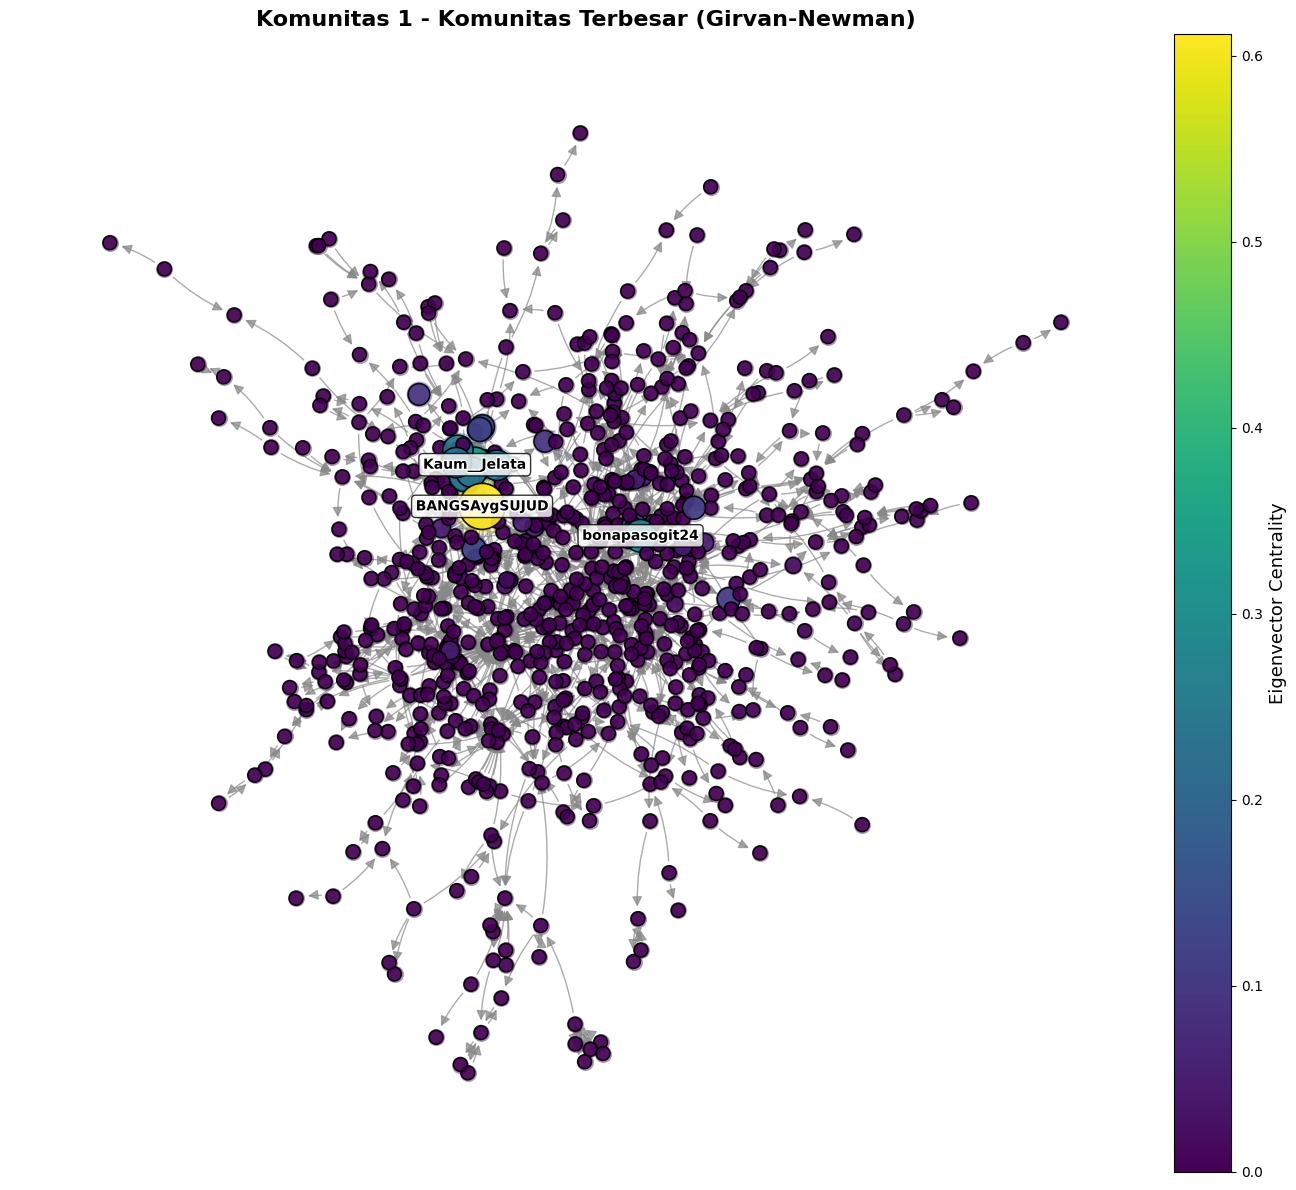


 [('BANGSAygSUJUD', 0.6114419586074127), ('Kaum__Jelata', 0.3260975443020148), ('bonapasogit24', 0.2791064817552322)]


In [ ]:
top_5_communities = communities_sorted[:5]

# Komunitas 1
community_1 = top_5_communities[0]
subgraph = G_active.subgraph(community_1)
pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

# Hitung eigenvector centrality untuk subgraph
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)
min_ev = min(eigenvector.values())
max_ev = max(eigenvector.values())

# Custom threshold dan skala node untuk komunitas 1
label_threshold = 0.05
scale_node_size = 1000

# Warna & ukuran berdasarkan eigenvector centrality
node_sizes = []
node_colors = []
for node in subgraph.nodes():
    norm = (eigenvector[node] - min_ev) / (max_ev - min_ev + 1e-6)
    node_sizes.append(100 + scale_node_size * norm)
    node_colors.append(cm.viridis(norm))  # ganti custom_cmap ke colormap bawaan (optional)

fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(
    subgraph, pos, edgelist=list(subgraph.edges()),
    edge_color='#888888', alpha=0.7,
    arrows=True, arrowstyle='-|>', arrowsize=15,
    connectionstyle='arc3,rad=0.1', ax=ax
)

# Glow
for j, node in enumerate(subgraph.nodes()):
    nx.draw_networkx_nodes(subgraph, pos,
        nodelist=[node], node_size=node_sizes[j]*1.3,
        node_color=[node_colors[j]], alpha=0.3, ax=ax)

# Node utama
nx.draw_networkx_nodes(subgraph, pos,
    node_size=node_sizes, node_color=node_colors,
    edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

# Label (ambil 5 node dengan eigenvector centrality tertinggi)
top_3_nodes = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_node_names = [node for node, _ in top_3_nodes]

for node, (x, y) in pos.items():
    if node in top_3_node_names:
        ax.text(
            x, y, node,
            fontsize=10, color='black', fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
        ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min_ev, vmax=max_ev))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality', fontsize=13, color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
cbar.outline.set_edgecolor('black')

ax.set_title("Komunitas 1 - Komunitas Terbesar (Girvan-Newman)", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n", top_3_nodes)

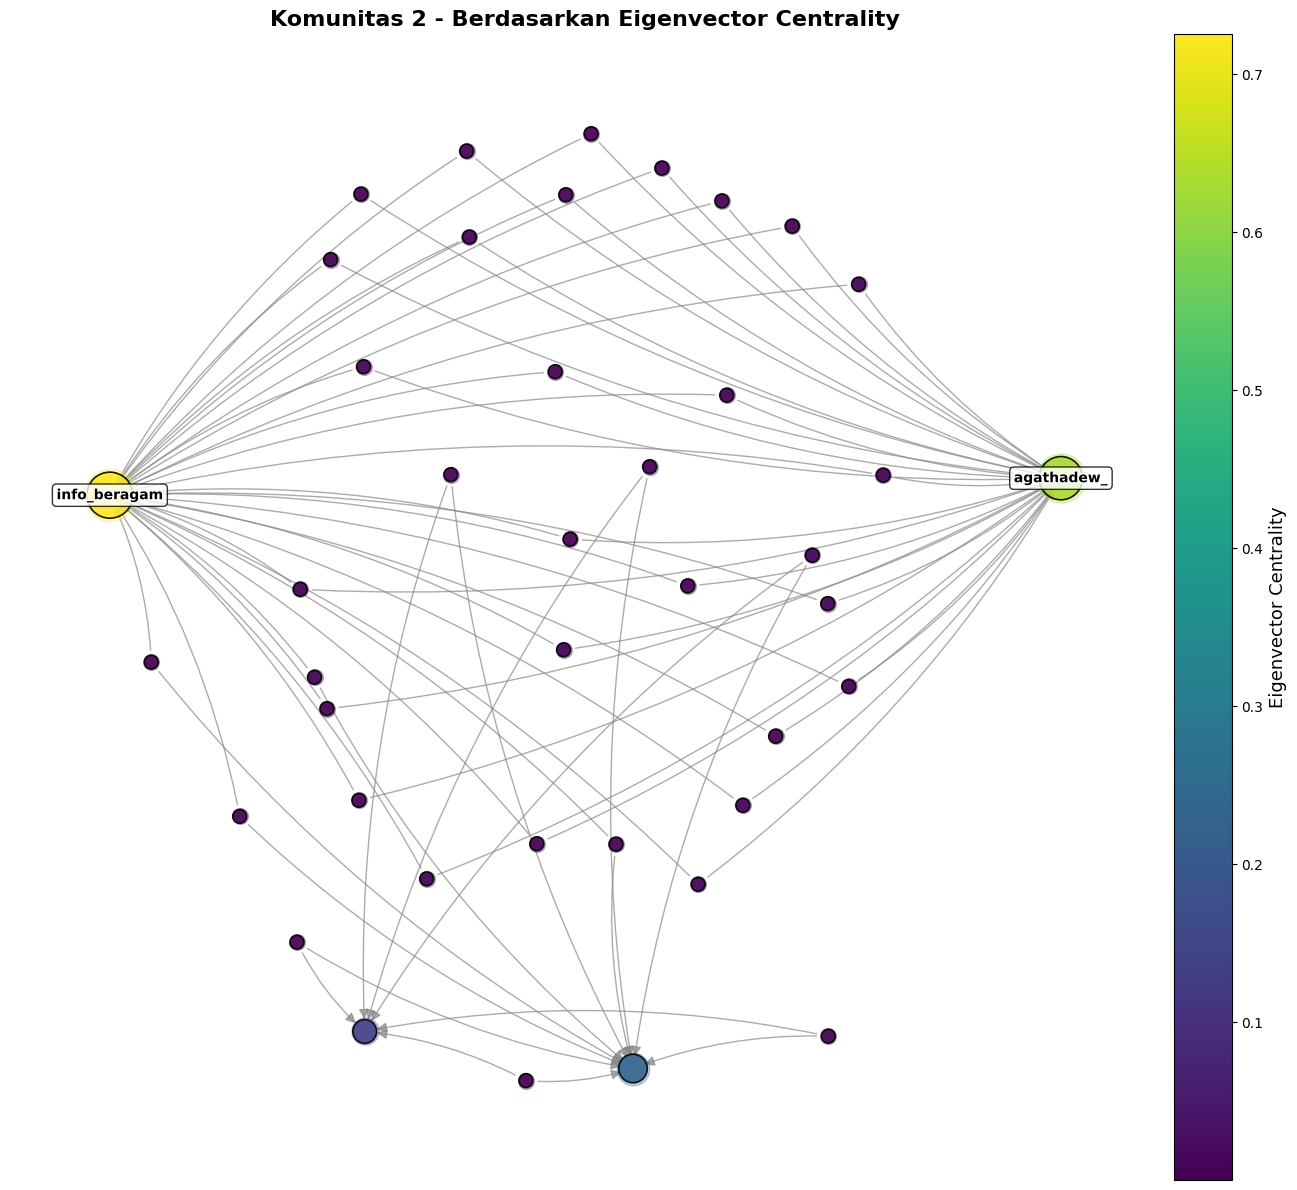


 [('info_beragam', 0.7254160745769819), ('agathadew_', 0.6318341255883363)]


In [ ]:

# Komunitas 2
community_2 = top_5_communities[1]
subgraph = G_active.subgraph(community_2)
pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

# Hitung eigenvector centrality untuk subgraph
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)
min_ev = min(eigenvector.values())
max_ev = max(eigenvector.values())

# Custom threshold dan skala node untuk komunitas 1
# label_threshold = 0.05
scale_node_size = 1000

# Warna & ukuran berdasarkan eigenvector centrality
node_sizes = []
node_colors = []
for node in subgraph.nodes():
    norm = (eigenvector[node] - min_ev) / (max_ev - min_ev + 1e-6)
    node_sizes.append(100 + scale_node_size * norm)
    node_colors.append(cm.viridis(norm))  # ganti custom_cmap ke colormap bawaan (optional)

fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(
    subgraph, pos, edgelist=list(subgraph.edges()),
    edge_color='#888888', alpha=0.7,
    arrows=True, arrowstyle='-|>', arrowsize=15,
    connectionstyle='arc3,rad=0.1', ax=ax
)

# Glow
for j, node in enumerate(subgraph.nodes()):
    nx.draw_networkx_nodes(subgraph, pos,
        nodelist=[node], node_size=node_sizes[j]*1.3,
        node_color=[node_colors[j]], alpha=0.3, ax=ax)

# Node utama
nx.draw_networkx_nodes(subgraph, pos,
    node_size=node_sizes, node_color=node_colors,
    edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

# Label (ambil 5 node dengan eigenvector centrality tertinggi)
top_2_nodes = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:2]
top_2_node_names = [node for node, _ in top_2_nodes]

for node, (x, y) in pos.items():
    if node in top_2_node_names:
        ax.text(
            x, y, node,
            fontsize=10, color='black', fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
        ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min_ev, vmax=max_ev))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality', fontsize=13, color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
cbar.outline.set_edgecolor('black')

ax.set_title("Komunitas 2 - Berdasarkan Eigenvector Centrality", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n", top_2_nodes)

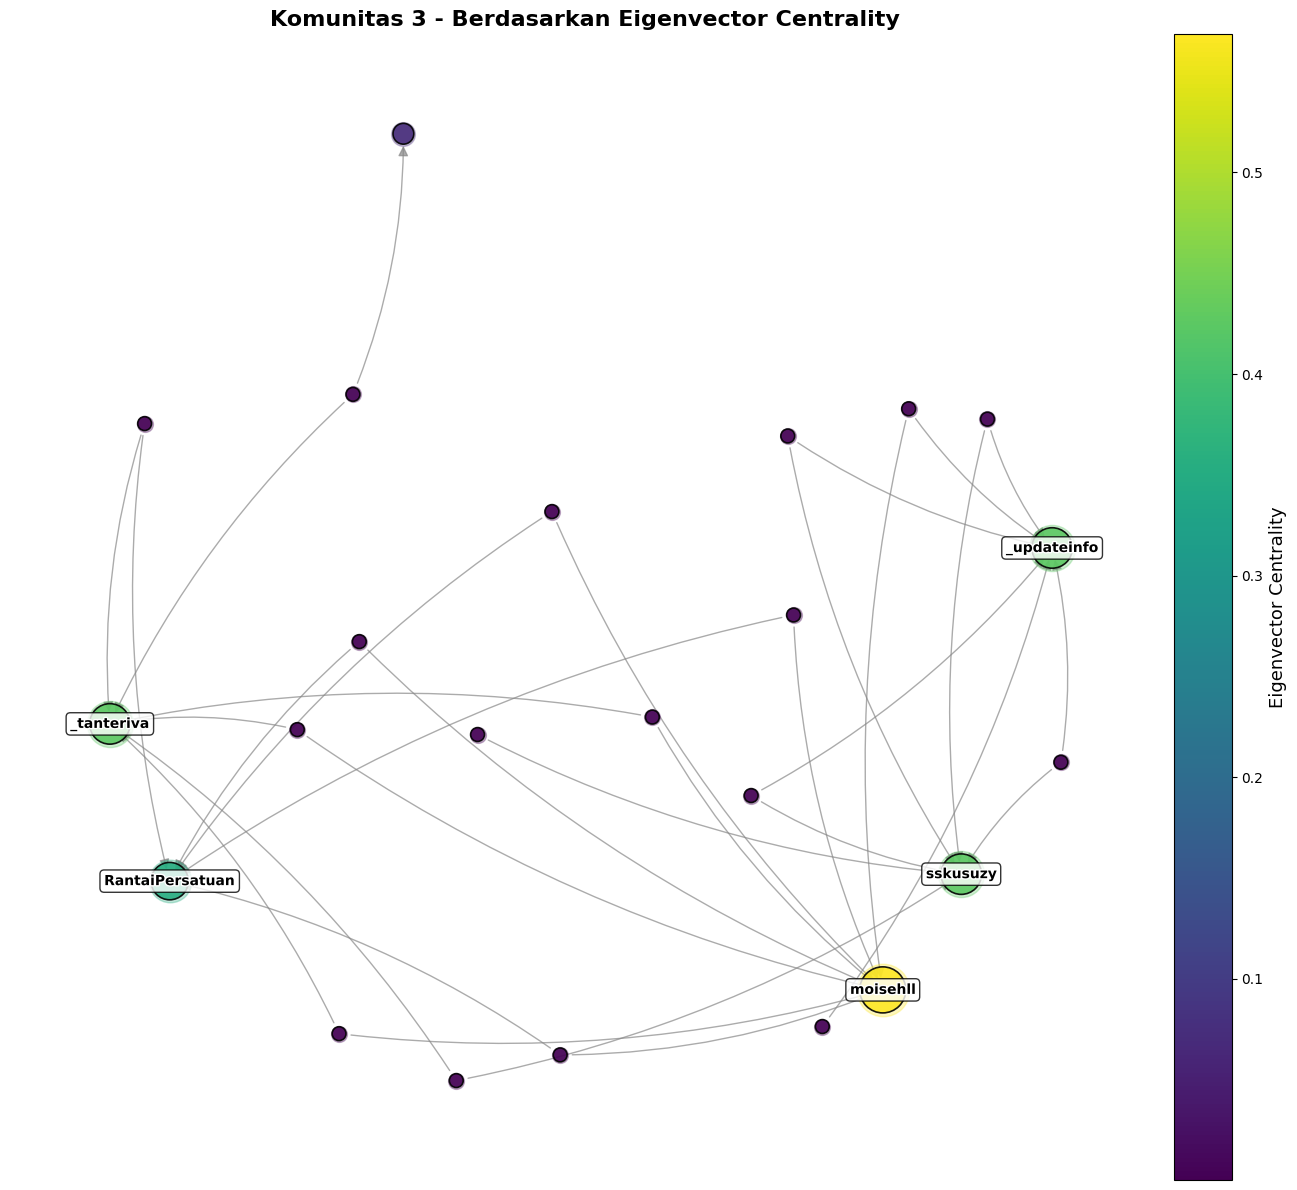


 [('moisehll', 0.568447752210791), ('_updateinfo', 0.4264101016322441), ('sskusuzy', 0.4264101016322441), ('_tanteriva', 0.4264101016322441), ('RantaiPersatuan', 0.355391276342971)]


In [ ]:
# Komunitas 3
community_3 = top_5_communities[2]
subgraph = G_active.subgraph(community_3)
pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

# Hitung eigenvector centrality untuk subgraph
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)
min_ev = min(eigenvector.values())
max_ev = max(eigenvector.values())

# Custom threshold dan skala node untuk komunitas 1
# label_threshold = 0.05
scale_node_size = 1000

# Warna & ukuran berdasarkan eigenvector centrality
node_sizes = []
node_colors = []
for node in subgraph.nodes():
    norm = (eigenvector[node] - min_ev) / (max_ev - min_ev + 1e-6)
    node_sizes.append(100 + scale_node_size * norm)
    node_colors.append(cm.viridis(norm))  # ganti custom_cmap ke colormap bawaan (optional)

fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(
    subgraph, pos, edgelist=list(subgraph.edges()),
    edge_color='#888888', alpha=0.7,
    arrows=True, arrowstyle='-|>', arrowsize=15,
    connectionstyle='arc3,rad=0.1', ax=ax
)

# Glow
for j, node in enumerate(subgraph.nodes()):
    nx.draw_networkx_nodes(subgraph, pos,
        nodelist=[node], node_size=node_sizes[j]*1.3,
        node_color=[node_colors[j]], alpha=0.3, ax=ax)

# Node utama
nx.draw_networkx_nodes(subgraph, pos,
    node_size=node_sizes, node_color=node_colors,
    edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

# Label (ambil 5 node dengan eigenvector centrality tertinggi)
top_5_nodes = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_node_names = [node for node, _ in top_5_nodes]

for node, (x, y) in pos.items():
    if node in top_5_node_names:
        ax.text(
            x, y, node,
            fontsize=10, color='black', fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
        ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min_ev, vmax=max_ev))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality', fontsize=13, color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
cbar.outline.set_edgecolor('black')

ax.set_title("Komunitas 3 - Berdasarkan Eigenvector Centrality", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n", top_5_nodes)

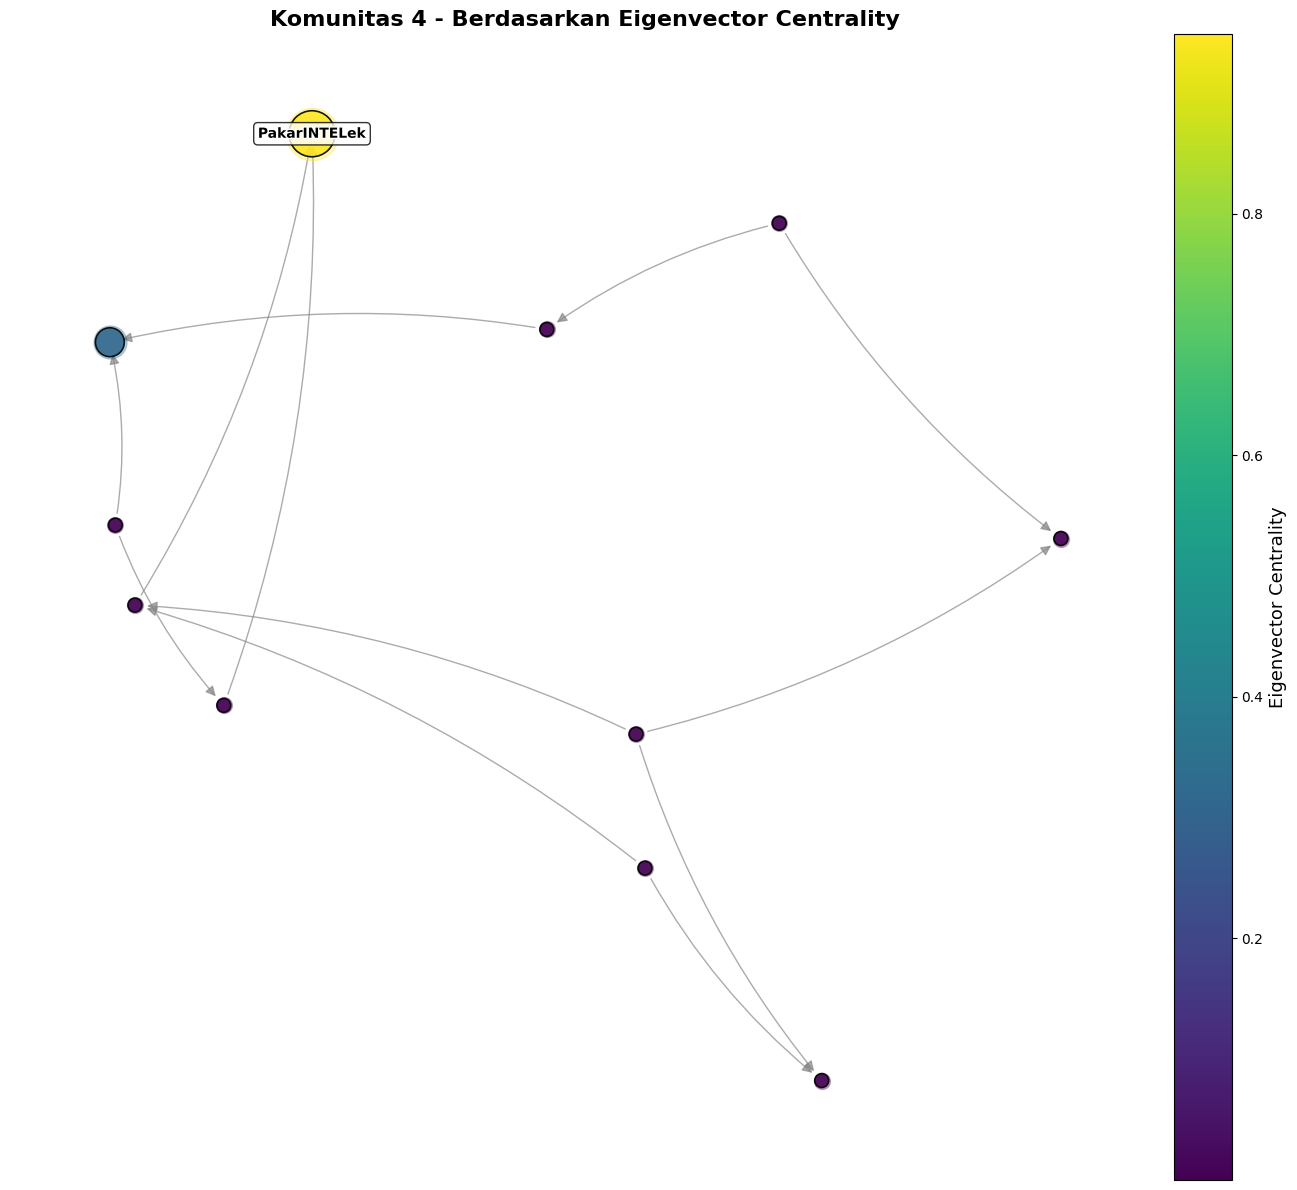


 [('PakarINTELek', 0.9483384402243111)]


In [ ]:
# Komunitas 4
community_4 = top_5_communities[3]
subgraph = G_active.subgraph(community_4)
pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

# Hitung eigenvector centrality untuk subgraph
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)
min_ev = min(eigenvector.values())
max_ev = max(eigenvector.values())

# Custom threshold dan skala node untuk komunitas 1
# label_threshold = 0.05
scale_node_size = 1000

# Warna & ukuran berdasarkan eigenvector centrality
node_sizes = []
node_colors = []
for node in subgraph.nodes():
    norm = (eigenvector[node] - min_ev) / (max_ev - min_ev + 1e-6)
    node_sizes.append(100 + scale_node_size * norm)
    node_colors.append(cm.viridis(norm))  # ganti custom_cmap ke colormap bawaan (optional)

fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(
    subgraph, pos, edgelist=list(subgraph.edges()),
    edge_color='#888888', alpha=0.7,
    arrows=True, arrowstyle='-|>', arrowsize=15,
    connectionstyle='arc3,rad=0.1', ax=ax
)

# Glow
for j, node in enumerate(subgraph.nodes()):
    nx.draw_networkx_nodes(subgraph, pos,
        nodelist=[node], node_size=node_sizes[j]*1.3,
        node_color=[node_colors[j]], alpha=0.3, ax=ax)

# Node utama
nx.draw_networkx_nodes(subgraph, pos,
    node_size=node_sizes, node_color=node_colors,
    edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

# Label (ambil 5 node dengan eigenvector centrality tertinggi)
top_1_nodes = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:1]
top_1_node_names = [node for node, _ in top_1_nodes]

for node, (x, y) in pos.items():
    if node in top_1_node_names:
        ax.text(
            x, y, node,
            fontsize=10, color='black', fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
        ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min_ev, vmax=max_ev))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality', fontsize=13, color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
cbar.outline.set_edgecolor('black')

ax.set_title("Komunitas 4 - Berdasarkan Eigenvector Centrality", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n", top_1_nodes)

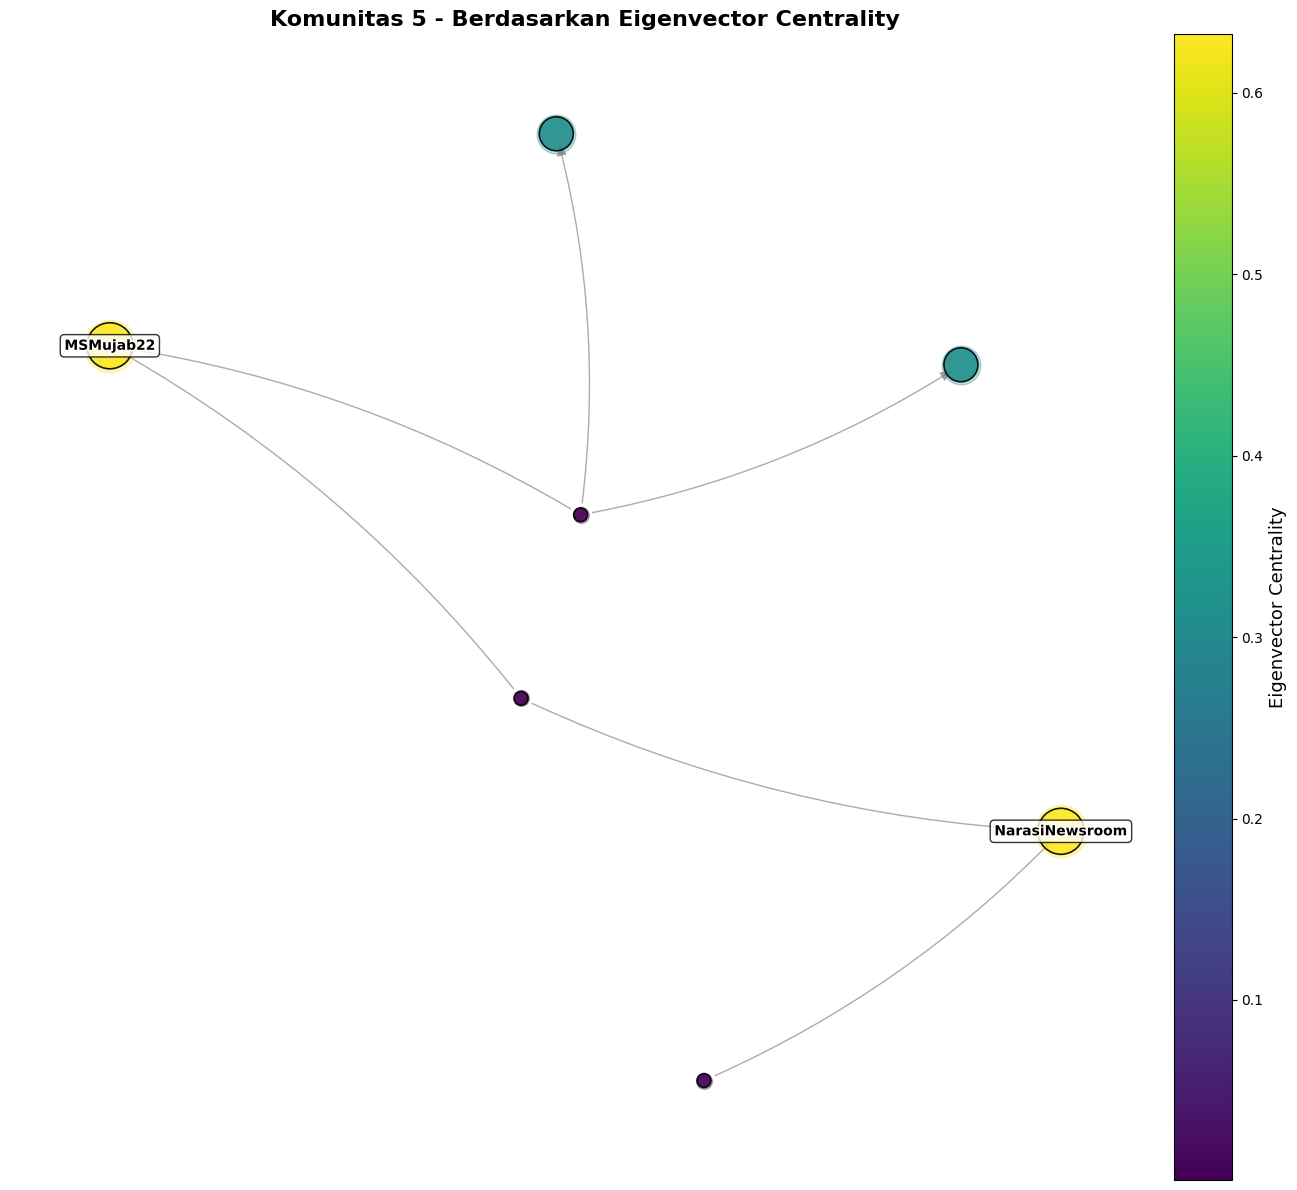


 [('NarasiNewsroom', 0.6323101088609481), ('MSMujab22', 0.6323101088609481)]


In [ ]:
# Komunitas 5
community_5 = top_5_communities[4]
subgraph = G_active.subgraph(community_5)
pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

# Hitung eigenvector centrality untuk subgraph
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)
min_ev = min(eigenvector.values())
max_ev = max(eigenvector.values())

# Custom threshold dan skala node untuk komunitas 1
# label_threshold = 0.05
scale_node_size = 1000

# Warna & ukuran berdasarkan eigenvector centrality
node_sizes = []
node_colors = []
for node in subgraph.nodes():
    norm = (eigenvector[node] - min_ev) / (max_ev - min_ev + 1e-6)
    node_sizes.append(100 + scale_node_size * norm)
    node_colors.append(cm.viridis(norm))  # ganti custom_cmap ke colormap bawaan (optional)

fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx_edges(
    subgraph, pos, edgelist=list(subgraph.edges()),
    edge_color='#888888', alpha=0.7,
    arrows=True, arrowstyle='-|>', arrowsize=15,
    connectionstyle='arc3,rad=0.1', ax=ax
)

# Glow
for j, node in enumerate(subgraph.nodes()):
    nx.draw_networkx_nodes(subgraph, pos,
        nodelist=[node], node_size=node_sizes[j]*1.3,
        node_color=[node_colors[j]], alpha=0.3, ax=ax)

# Node utama
nx.draw_networkx_nodes(subgraph, pos,
    node_size=node_sizes, node_color=node_colors,
    edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

# Label (ambil 5 node dengan eigenvector centrality tertinggi)
top_2_nodes = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:2]
top_2_node_names = [node for node, _ in top_2_nodes]

for node, (x, y) in pos.items():
    if node in top_2_node_names:
        ax.text(
            x, y, node,
            fontsize=10, color='black', fontweight='bold',
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
        ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min_ev, vmax=max_ev))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality', fontsize=13, color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
cbar.outline.set_edgecolor('black')

ax.set_title("Komunitas 5 - Berdasarkan Eigenvector Centrality", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n", top_2_nodes)

# Community Detection Spectral Clustering

In [ ]:
# Filter Simpul Aktif
active_nodes = [n for n in G.nodes() if G.degree(n) > 1]
G_active = G.subgraph(active_nodes).copy()

print(f"Graf aktif - simpul: {G_active.number_of_nodes()}, edges: {G_active.number_of_edges()}")

Graf aktif - simpul: 1159, edges: 1375


In [ ]:
# Membuat Laplacian Matrix
node_list = list(G_active.nodes())  # Simpan urutan node

A = nx.to_numpy_array(G_active, nodelist=node_list)
D = np.diag(np.sum(A, axis=1))
L = D - A

In [ ]:
# Menghitung Eigenvector (Spektral)
k = 5
eigval, eigvec = eigsh(L, k=k, which='SM')  # SM = smallest magnitude

In [ ]:
# K-means Clustering pada Eigenvector
eigvec_norm = normalize(eigvec)

# K-means clustering pada eigenvector
kmeans = KMeans(n_clusters=k, random_state=0).fit(eigvec_norm)
labels = kmeans.labels_

In [ ]:
# Mapping simpul ke komunitas
komunitas = {node_list[i]: labels[i] for i in range(len(labels))}

for i in range(k):
    anggota = [node for node in node_list if komunitas[node] == i]
    print(f"Komunitas {i+1} ({len(anggota)} simpul): {anggota}")

Komunitas 1 (445 simpul): ['adri_zizie', 'CahBajang2', 'xningiie', 'binblancos', 'Penyuka_ombak', 'Kimberley_PS08', 'sgkxt', 'riksayuda', 'jakesnappy', 'islah_bahrawi', 'ike_hw71', 'agathadew_', 'AyamSegar3', 'UmarHasibuan__', 'wisnu_prasetya', '7pm5vl', 'democrazymedia', 'narkosun', 'geloraco', 'bingungtrs_', 'zero0grqvity', 'berttttt_22', 'JurdilNdasMu', 'zoelfick', 'jilulisme', 'paceklax', 'idextratime', 'ben_yelet', 'pakmul63', 'akuntwiter968', 'MSMujab22', 'MariaAlkaff_', 'Dahnilanzar', 'pooorez', 'BudiBukanIntel', 'mikuroQ', 'Anak__Ogi', 'Duren___', 'kegblgnunfaedh', 'nenrvous', 'Sandika_Noor', '__PASMANTAP', 'Homo_sapiens21', 'HumorJonTampan', 'Rocky_Antonie', 'deeewtee', 'GOAL_ID', 'MurtadhaOne1', 'GembelProj95880', 'WSTWMYKY', 'freethink32', 'bachrum_achmadi', 'surya_istqmh', 'chronicle187', 'Kwangwung5', 'SBYudhoyono', 'msaid_didu', 'Pai_C1', 'sugarcandyii', 'halukinasi', 'toe_giman', 'Cevylinze_ex', 'balabalabilibul', 'Adriandhy', 'sugondese6666', 'txtdrimedia', 'evsspoir', 

In [ ]:
# Menghitung Modularity dari seluruh komunitas
partition = []
for i in range(k):
    members = [node_list[j] for j in range(len(labels)) if labels[j] == i]
    partition.append(set(members))

mod_score_spectral = modularity(G_active.to_undirected(), partition)
print(f"Modularity Score: {mod_score_spectral:.4f}")

Modularity Score: -0.0983


In [ ]:
# Menghitung Sillhouette Score dari seluruh komunitas
sil_score = silhouette_score(eigvec_norm, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6917


In [ ]:
deg_centrality_all = nx.degree_centrality(G_active)

for i in range(k):
    anggota = [node for node in node_list if komunitas[node] == i]
    subgraph = G_active.subgraph(anggota)

    centrality = nx.degree_centrality(subgraph)
    top_node = max(centrality, key=centrality.get)

    print(f"🔹 Komunitas {i+1} (anggota: {len(anggota)} node)")
    print(f"   - Anggota node dalam komunitas: {anggota}")
    print(f"   - Node paling berpengaruh: {top_node}")
    print(f"   - Degree centrality: {centrality[top_node]:.4f}\n")

🔹 Komunitas 1 (anggota: 445 node)
   - Anggota node dalam komunitas: ['adri_zizie', 'CahBajang2', 'xningiie', 'binblancos', 'Penyuka_ombak', 'Kimberley_PS08', 'sgkxt', 'riksayuda', 'jakesnappy', 'islah_bahrawi', 'ike_hw71', 'agathadew_', 'AyamSegar3', 'UmarHasibuan__', 'wisnu_prasetya', '7pm5vl', 'democrazymedia', 'narkosun', 'geloraco', 'bingungtrs_', 'zero0grqvity', 'berttttt_22', 'JurdilNdasMu', 'zoelfick', 'jilulisme', 'paceklax', 'idextratime', 'ben_yelet', 'pakmul63', 'akuntwiter968', 'MSMujab22', 'MariaAlkaff_', 'Dahnilanzar', 'pooorez', 'BudiBukanIntel', 'mikuroQ', 'Anak__Ogi', 'Duren___', 'kegblgnunfaedh', 'nenrvous', 'Sandika_Noor', '__PASMANTAP', 'Homo_sapiens21', 'HumorJonTampan', 'Rocky_Antonie', 'deeewtee', 'GOAL_ID', 'MurtadhaOne1', 'GembelProj95880', 'WSTWMYKY', 'freethink32', 'bachrum_achmadi', 'surya_istqmh', 'chronicle187', 'Kwangwung5', 'SBYudhoyono', 'msaid_didu', 'Pai_C1', 'sugarcandyii', 'halukinasi', 'toe_giman', 'Cevylinze_ex', 'balabalabilibul', 'Adriandhy', '

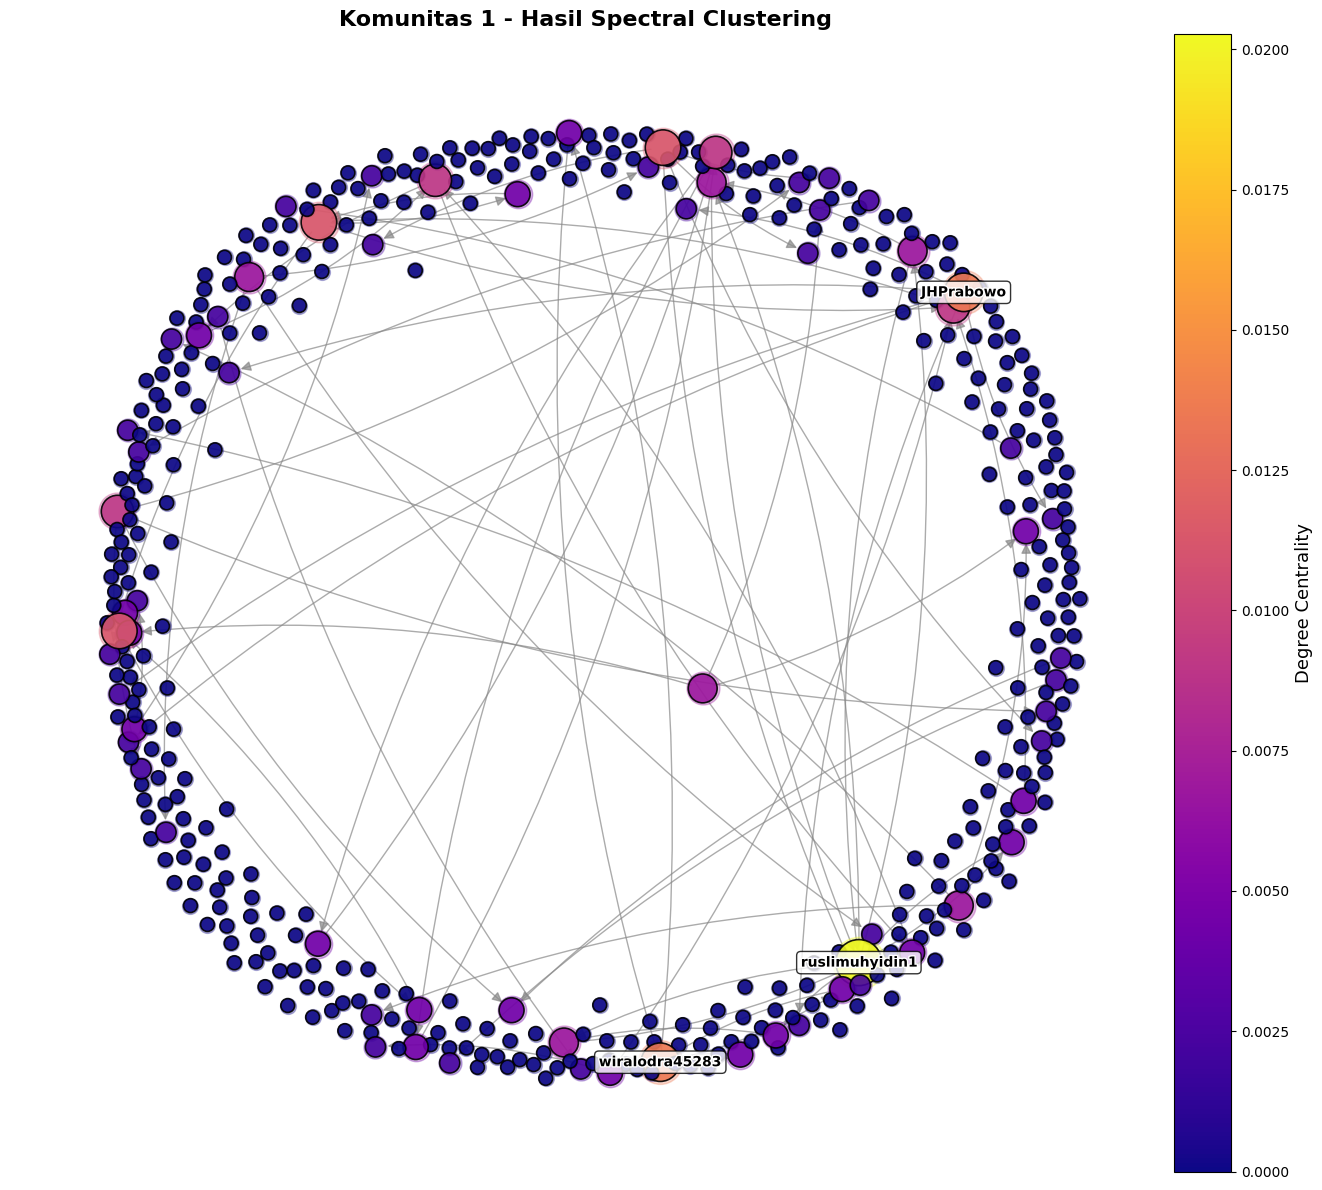

Top 3 node Komunitas 1: [('ruslimuhyidin1', 0.02027027027027027), ('wiralodra45283', 0.013513513513513514), ('JHPrabowo', 0.013513513513513514)]


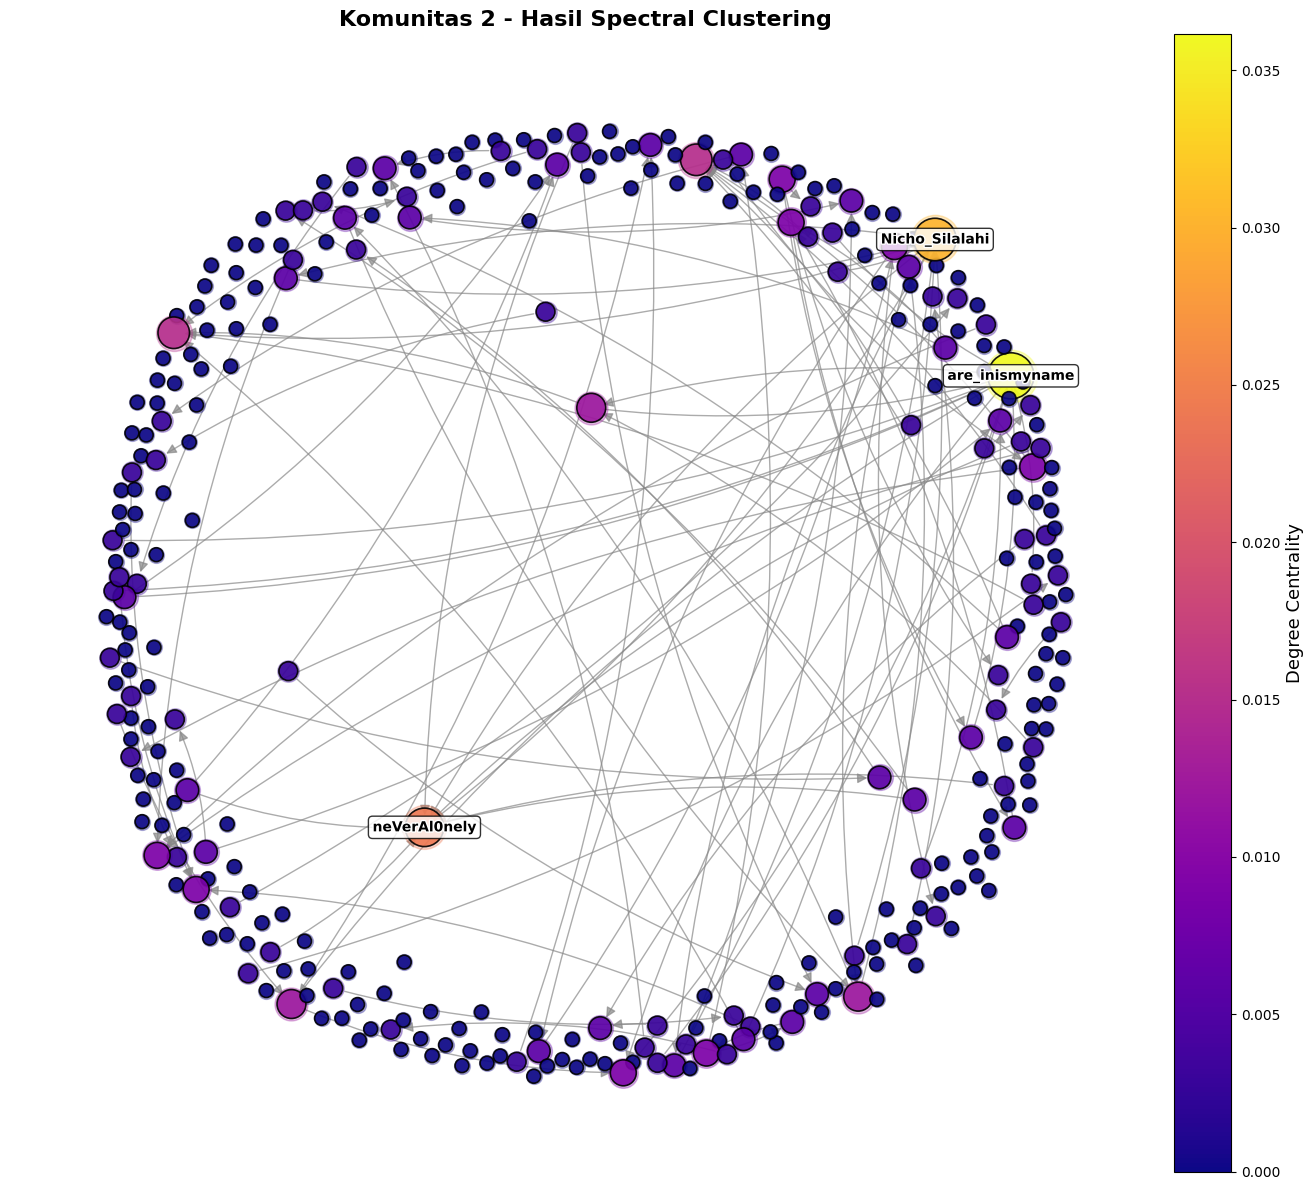

Top 3 node Komunitas 2: [('are_inismyname', 0.03614457831325302), ('Nicho_Silalahi', 0.030120481927710843), ('neVerAl0nely', 0.024096385542168676)]


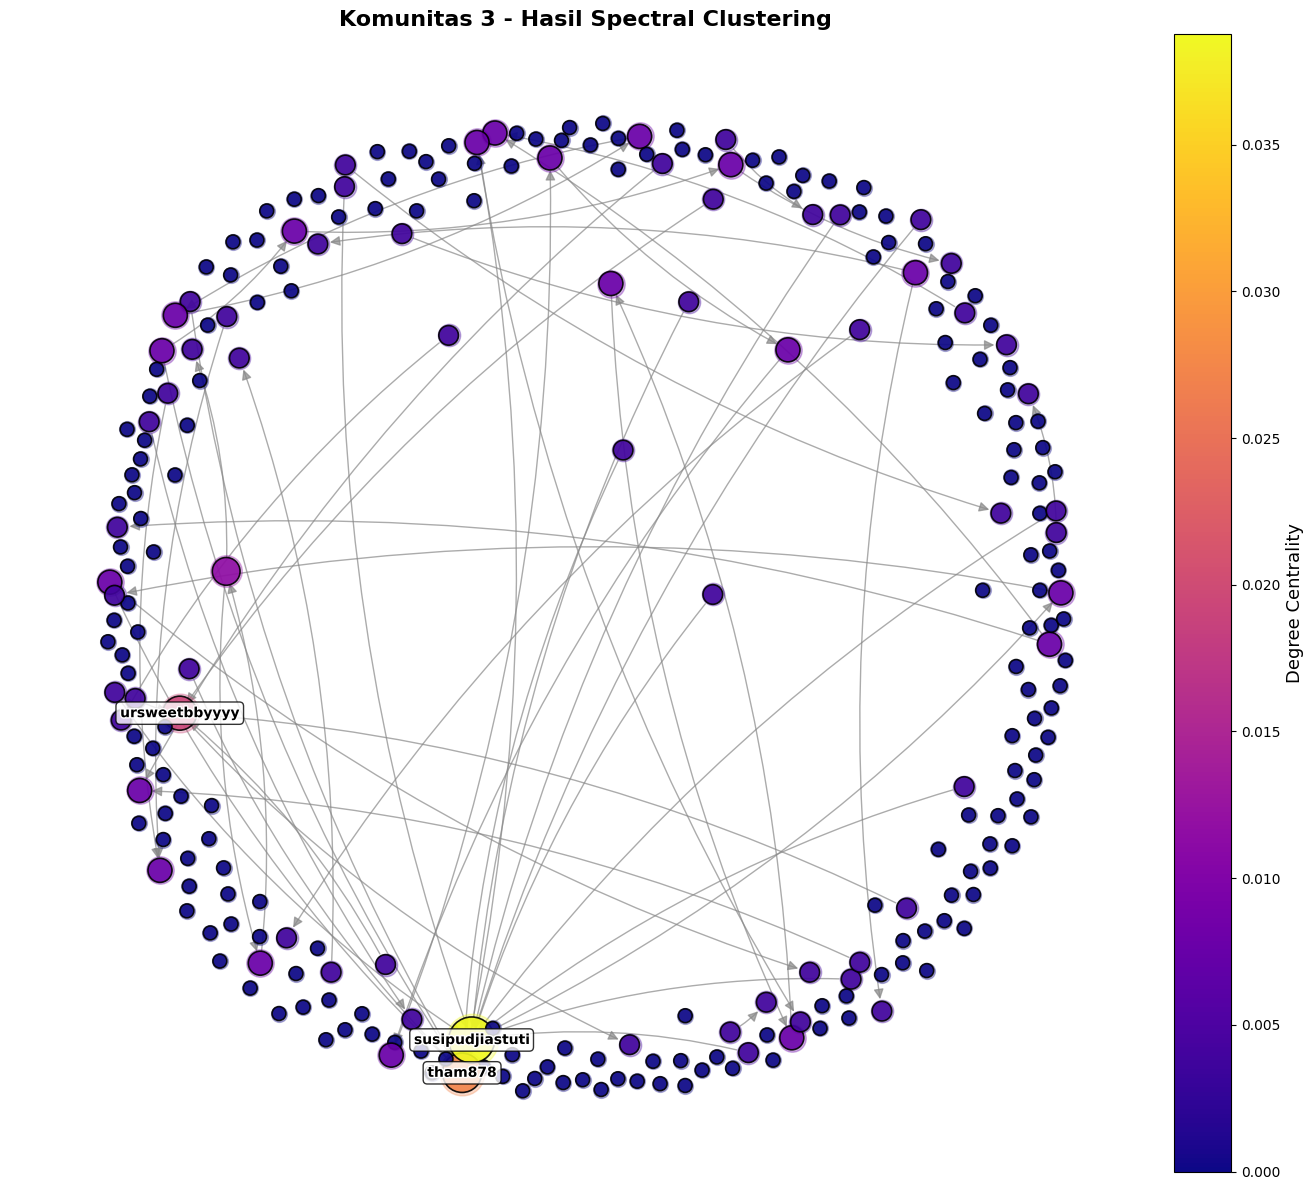

Top 3 node Komunitas 3: [('susipudjiastuti', 0.03875968992248062), ('tham878', 0.027131782945736434), ('ursweetbbyyyy', 0.01937984496124031)]


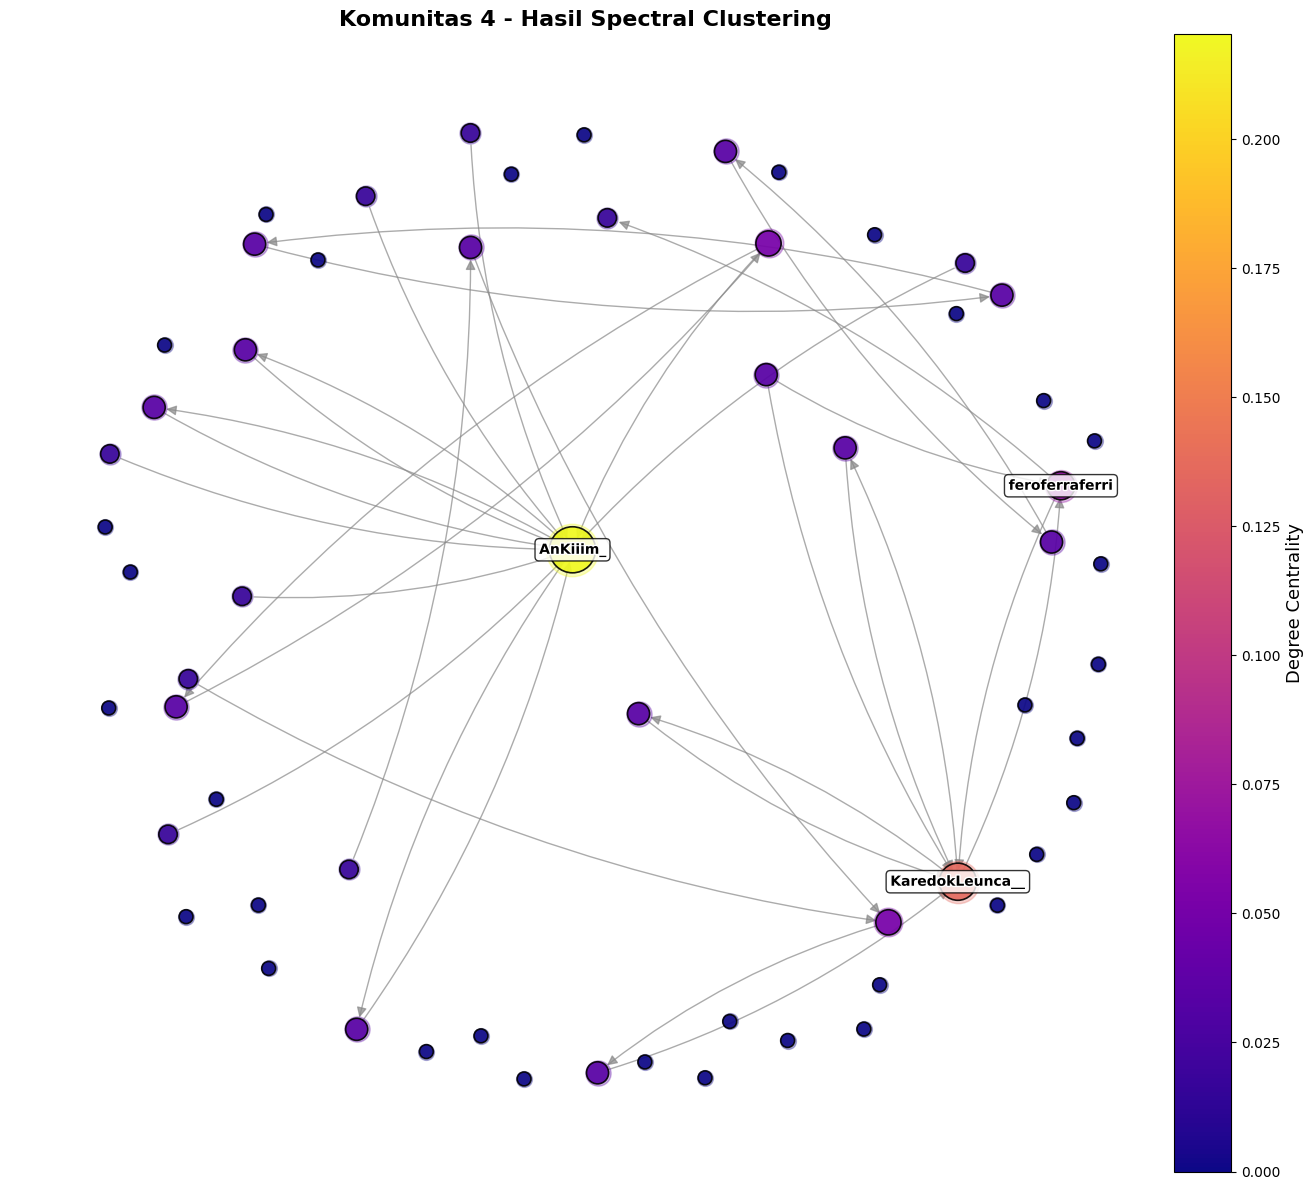

Top 3 node Komunitas 4: [('AnKiiim_', 0.22033898305084745), ('KaredokLeunca__', 0.13559322033898305), ('feroferraferri', 0.06779661016949153)]


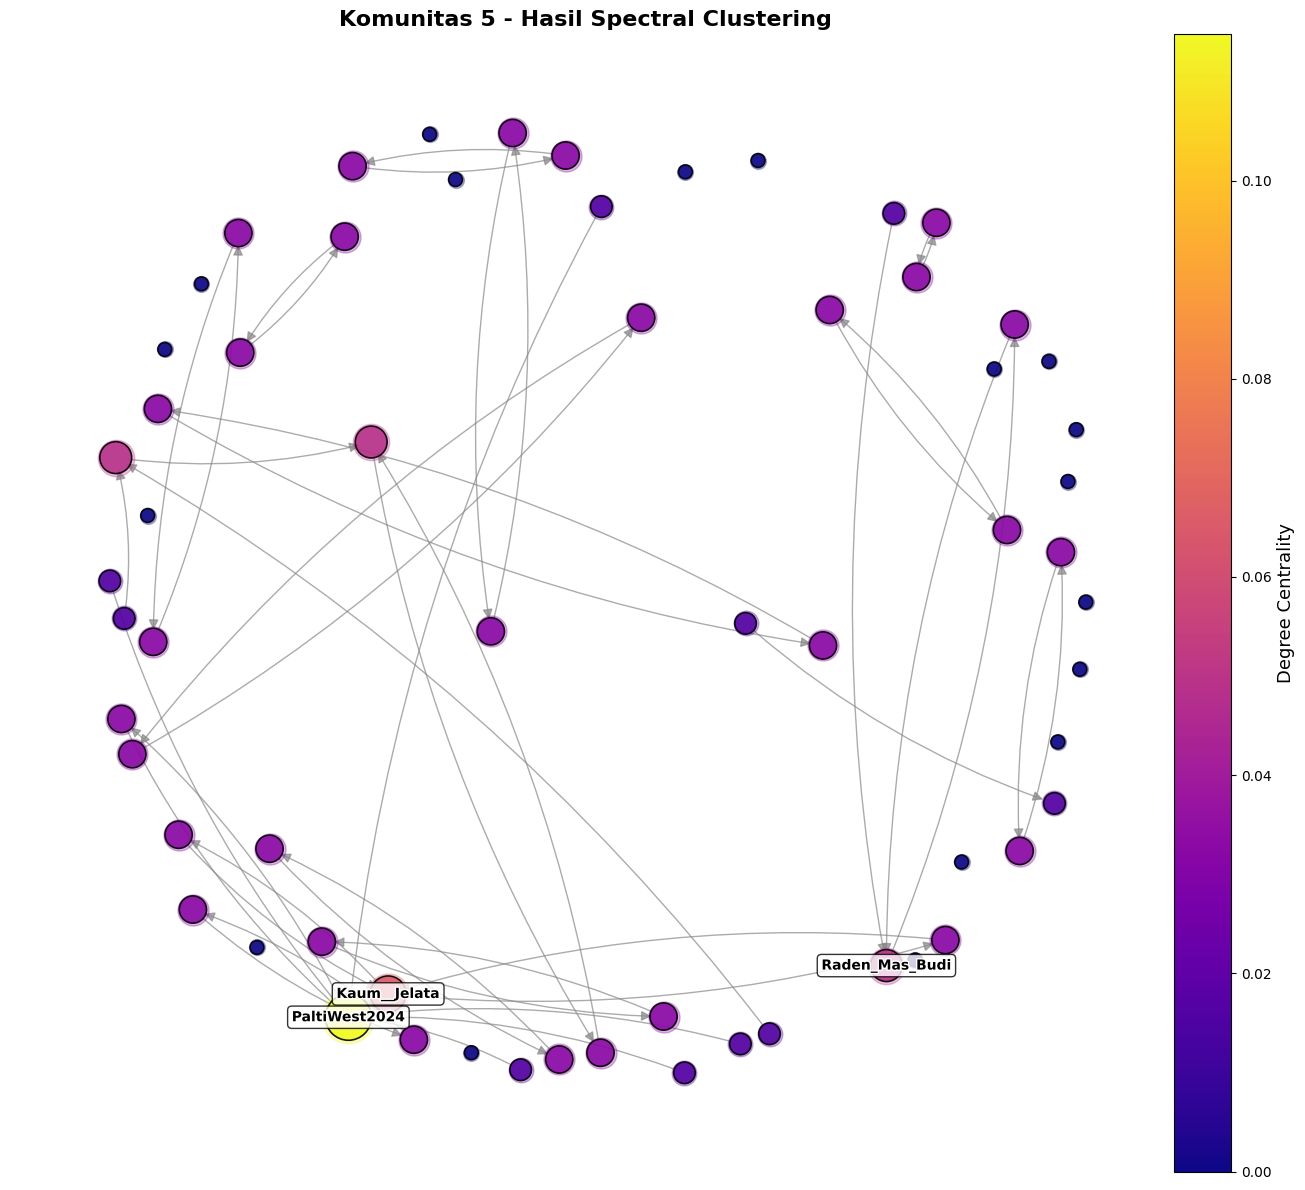

Top 3 node Komunitas 5: [('PaltiWest2024', 0.11475409836065574), ('Kaum__Jelata', 0.06557377049180328), ('Raden_Mas_Budi', 0.04918032786885246)]


In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

# Visualisasi setiap komunitas
for i in range(k):
    anggota = [node for node in node_list if komunitas[node] == i]
    subgraph = G_active.subgraph(anggota)

    # Layout posisi node
    pos = nx.spring_layout(subgraph, k=1.2, iterations=50, seed=42)

    # Hitung degree centrality
    degree_centrality = nx.degree_centrality(subgraph)
    min_dc = min(degree_centrality.values())
    max_dc = max(degree_centrality.values())

    # Skala dan threshold
    scale_node_size = 1000
    label_threshold = 0.05  # Tidak dipakai langsung tapi bisa disesuaikan jika perlu

    node_sizes = []
    node_colors = []
    for node in subgraph.nodes():
        norm = (degree_centrality[node] - min_dc) / (max_dc - min_dc + 1e-6)
        node_sizes.append(100 + scale_node_size * norm)
        node_colors.append(cm.plasma(norm))  # Bisa ganti colormap: viridis, plasma, etc.

    # Gambar visualisasi
    fig, ax = plt.subplots(figsize=(14, 12))
    nx.draw_networkx_edges(
        subgraph, pos, edgelist=list(subgraph.edges()),
        edge_color='#888888', alpha=0.7,
        arrows=True, arrowstyle='-|>', arrowsize=15,
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Glow
    for j, node in enumerate(subgraph.nodes()):
        nx.draw_networkx_nodes(subgraph, pos,
            nodelist=[node], node_size=node_sizes[j]*1.3,
            node_color=[node_colors[j]], alpha=0.3, ax=ax)

    # Node utama
    nx.draw_networkx_nodes(subgraph, pos,
        node_size=node_sizes, node_color=node_colors,
        edgecolors='black', linewidths=1.2, alpha=0.9, ax=ax)

    # Label untuk top 3 node
    top_3_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_3_node_names = [node for node, _ in top_3_nodes]

    for node, (x, y) in pos.items():
        if node in top_3_node_names:
            ax.text(
                x, y, node,
                fontsize=10, color='black', fontweight='bold',
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8)
            ).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=min_dc, vmax=max_dc))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.01)
    cbar.set_label('Degree Centrality', fontsize=13, color='black')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
    cbar.outline.set_edgecolor('black')

    ax.set_title(f"Komunitas {i+1} - Hasil Spectral Clustering", fontsize=16, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Top 3 node Komunitas {i+1}: {top_3_nodes}")


# Perbandingan Analisis antara Girvan-Newman dan Spectral Clustering

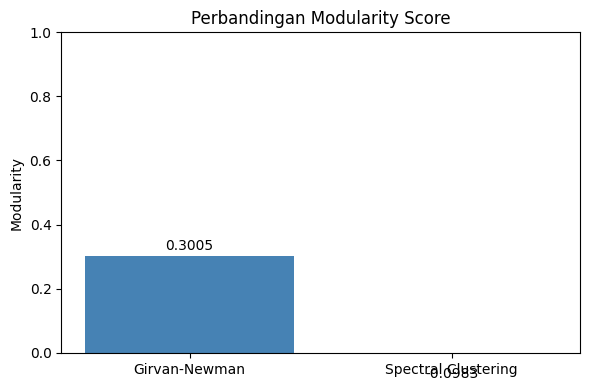

In [ ]:
# Perbedaan Nilai Modularity dari Kedua Metode
scores = [mod_score_girvan, mod_score_spectral]
labels = ['Girvan-Newman', 'Spectral Clustering']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, scores, color=['steelblue', 'orange'])
plt.title('Perbandingan Modularity Score')
plt.ylabel('Modularity')
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

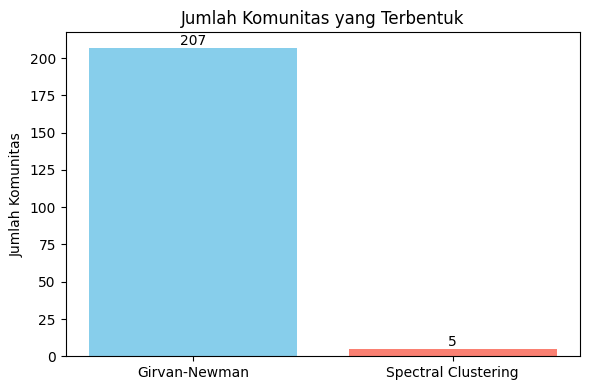

In [ ]:
# Perbedaan Jumlah Komunitas dari Kedua Metode
jumlah_komunitas_girvan = len(girvan_communities)
jumlah_komunitas_spectral = len(partition)

# Simpan jumlah komunitas
jumlah_komunitas = [jumlah_komunitas_girvan, jumlah_komunitas_spectral]
metode = ['Girvan-Newman', 'Spectral Clustering']

# Visualisasi bar chart jumlah komunitas
plt.figure(figsize=(6, 4))
bars = plt.bar(metode, jumlah_komunitas, color=['skyblue', 'salmon'])
plt.title('Jumlah Komunitas yang Terbentuk')
plt.ylabel('Jumlah Komunitas')

# Tambahkan label jumlah di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

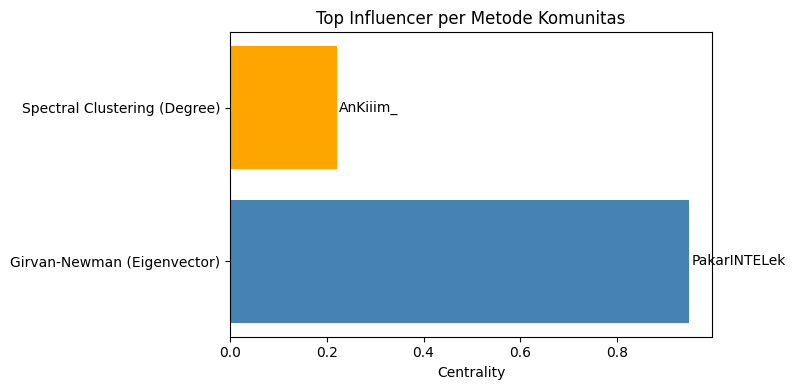

In [ ]:
# Perbedaan Orang paling berpengaruh dari Kedua Metode
def safe_eigenvector_centrality(G, max_iter=1000, tol=1e-06):
    try:
        centrality = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol)
    except nx.PowerIterationFailedConvergence:
        centrality = nx.eigenvector_centrality_numpy(G)
    return centrality

top_girvan = []
for community in top_5_communities[:5]:
    subgraph = G_active.subgraph(community)
    centrality = safe_eigenvector_centrality(subgraph)
    top_node = max(centrality, key=centrality.get)
    top_girvan.append((top_node, centrality[top_node]))

top_girvan_overall = max(top_girvan, key=lambda x: x[1])

top_spectral = []
for community in partition[:5]:
    subgraph = G_active.subgraph(community)
    centrality = nx.degree_centrality(subgraph)
    top_node = max(centrality, key=centrality.get)
    top_spectral.append((top_node, centrality[top_node]))

top_spectral_overall = max(top_spectral, key=lambda x: x[1])

labels = ['Girvan-Newman (Eigenvector)', 'Spectral Clustering (Degree)']
values = [top_girvan_overall[1], top_spectral_overall[1]]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(labels, values, color=['steelblue', 'orange'])

for bar, (node_label, _) in zip(bars, [top_girvan_overall, top_spectral_overall]):
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2,
            f"{node_label}", va='center', fontsize=10)

ax.set_xlabel('Centrality')
ax.set_title('Top Influencer per Metode Komunitas')
plt.tight_layout()
plt.show()
